In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
import scipy 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
import sklearn.metrics as sm

In [3]:
df = pd.read_csv('clean_data.csv')
df.head()

,household_id,SA2,HHSIZE,TOTALVEHS,INC,age_profile,HHSIZE_normalised,TOTALVEHS_normalised,INC_normalised,DWELLTYPE_Flat or Apartment,DWELLTYPE_Other,DWELLTYPE_Separate House,DWELLTYPE_Terrace/Townhouse,OWNDWELL_Being Purchased,OWNDWELL_Being Rented,OWNDWELL_Fully Owned,OWNDWELL_Occupied Rent-Free,OWNDWELL_Something Else
0,1,206011105,2,2,2350,1,0.125,0.4,0.719219,0,0,1,0,0,0,1,0,0
1,2,206011105,2,1,800,0,0.125,0.2,0.225225,0,0,1,0,1,0,0,0,0
2,3,206011105,2,1,800,0,0.125,0.2,0.225225,0,0,1,0,1,0,0,0,0
3,4,206011105,2,2,4000,1,0.125,0.4,0.944945,0,1,0,0,1,0,0,0,0
4,5,206011105,2,2,4000,1,0.125,0.4,0.944945,0,1,0,0,1,0,0,0,0


In [4]:
sample_size = 5000
clusters = 10
my_n_init = 10
df_sample = df.sample(sample_size, random_state=42)
score_kmeans_bool = []

In [5]:
df_norm = pd.DataFrame()
df_norm = df_sample[['HHSIZE_normalised', 'TOTALVEHS_normalised', 'INC_normalised','DWELLTYPE_Separate House', 'age_profile']].copy()
df_norm.loc[:, 'owndwell'] = df_sample['OWNDWELL_Being Purchased'] | df_sample['OWNDWELL_Fully Owned']
df_norm.head()

,HHSIZE_normalised,TOTALVEHS_normalised,INC_normalised,DWELLTYPE_Separate House,age_profile,owndwell
112679,0.125,0.0,0.656657,0,0,0
864439,0.000,0.2,0.068068,1,0,1
1180461,0.250,0.2,0.375876,1,1,1
1307167,0.250,0.8,0.225225,1,1,1
1029345,0.375,0.2,0.966967,1,1,1


In [6]:
high_inc = df_sample['INC'].quantile(0.9)
df_bool = pd.DataFrame()
df_bool["veh2"] = df_sample['TOTALVEHS'].apply(lambda x: 1 if x >= 2 else 0)
df_bool["highinc"] = df_sample['INC'].apply(lambda x: 1 if x >= high_inc else 0)
df_bool["house"] = df_sample['DWELLTYPE_Separate House']
df_bool["ownner"] = (df_sample['OWNDWELL_Being Purchased'] | df['OWNDWELL_Fully Owned']).astype(int)
df_bool["age"] = df_sample['age_profile']
df_bool["hhsize"] = df_sample['HHSIZE'].apply(lambda x: 1 if x >= 2 else 0)
df_bool.head()

,veh2,highinc,house,ownner,age,hhsize
112679,0,0,0,0,0,1
864439,0,0,1,1,0,0
1180461,0,0,1,1,1,1
1307167,1,0,1,1,1,1
1029345,0,1,1,1,1,1


In [7]:
score_kmeans_bool = []
score_kmeans_norm = []
score_gmm_bool = []
score_gmm_norm = []
score_hclust_bool = []
score_hclust_norm = []


silhouette_kmeans_bool = []
silhouette_kmeans_norm = []
silhouette_gmm_bool = []
silhouette_gmm_norm = []
silhouette_hclust_bool = []
silhouette_hclust_norm = []
 
for i in range(3,clusters+1):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(df_bool)
    score_kmeans_bool.append(calinski_harabasz_score(df_bool, kmeans.labels_))
    silhouette_kmeans_bool.append(silhouette_score(df_bool, kmeans.labels_))

    kmeans = KMeans(n_clusters=i, n_init=my_n_init).fit(df_norm)
    score_kmeans_norm.append(calinski_harabasz_score(df_norm, kmeans.labels_))
    silhouette_kmeans_norm.append(silhouette_score(df_norm, kmeans.labels_))

    gmm = GaussianMixture(n_components=i).fit(df_bool)
    score_gmm_bool.append(calinski_harabasz_score(df_bool, gmm.predict(df_bool)))
    silhouette_gmm_bool.append(silhouette_score(df_bool, gmm.predict(df_bool)))

    gmm = GaussianMixture(n_components=i).fit(df_norm)
    score_gmm_norm.append(calinski_harabasz_score(df_norm, gmm.predict(df_norm)))
    silhouette_gmm_norm.append(silhouette_score(df_norm, gmm.predict(df_norm)))
    
    hclust = AgglomerativeClustering(n_clusters=i, linkage='ward', metric='euclidean')
    hclust.fit(df_bool)
    score_hclust_bool.append(calinski_harabasz_score(df_bool, hclust.labels_))
    silhouette_hclust_bool.append(silhouette_score(df_bool, hclust.labels_))

    hclust.fit(df_norm)
    score_hclust_norm.append(calinski_harabasz_score(df_norm, hclust.labels_))
    silhouette_hclust_norm.append(silhouette_score(df_norm, hclust.labels_))
    

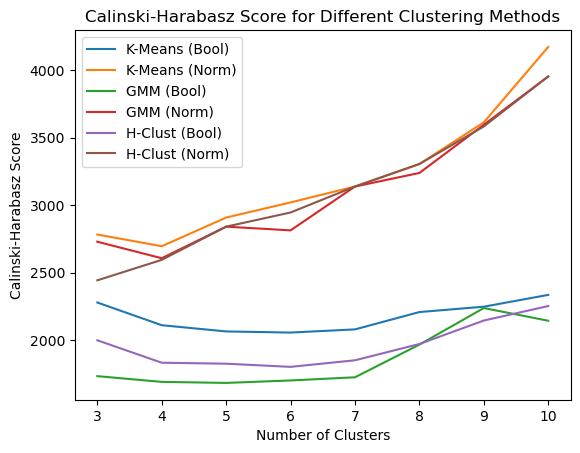

In [8]:
x = np.arange(3, clusters+1)

plt.plot(x, score_kmeans_bool, label='K-Means (Bool)')
plt.plot(x, score_kmeans_norm, label='K-Means (Norm)')
plt.plot(x, score_gmm_bool, label='GMM (Bool)')
plt.plot(x, score_gmm_norm, label='GMM (Norm)')
plt.plot(x, score_hclust_bool, label='H-Clust (Bool)')
plt.plot(x, score_hclust_norm, label='H-Clust (Norm)')

plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Different Clustering Methods')
plt.legend()
plt.show()


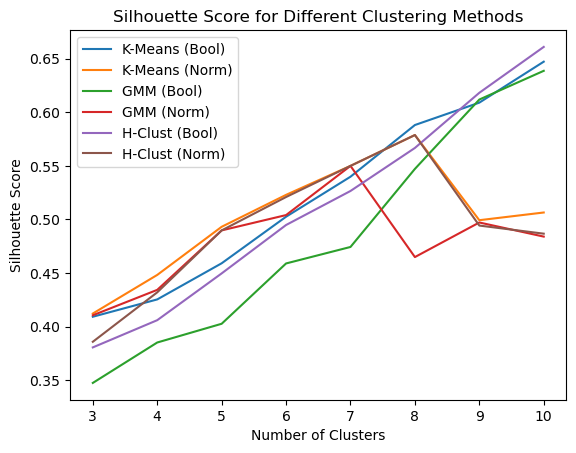

In [10]:
x = np.arange(3, clusters+1)

plt.plot(x, silhouette_kmeans_bool, label='K-Means (Bool)')
plt.plot(x, silhouette_kmeans_norm, label='K-Means (Norm)')
plt.plot(x, silhouette_gmm_bool, label='GMM (Bool)')
plt.plot(x, silhouette_gmm_norm, label='GMM (Norm)')
plt.plot(x, silhouette_hclust_bool, label='H-Clust (Bool)')
plt.plot(x, silhouette_hclust_norm, label='H-Clust (Norm)')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Clustering Methods')
plt.legend()
plt.show()